In [46]:
import xgboost
from pandas import read_csv
from matplotlib import pyplot
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from numpy import asarray
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


from xgboost import plot_tree
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_text

from numpy.random import seed
seed(8)
#from xgboost import XGBRegressor
print(xgboost.__version__)

1.5.0


In [50]:
########### My Research ########################
#x = pd.read_csv("C:/Users/DI BO/OneDrive - University of Tennessee/R/mydata3.csv")
#x = pd.read_csv("C:/Users/User/OneDrive - University of Tennessee/R/mydata3.csv")
x = pd.read_csv("C:/Users/dbo/OneDrive - University of Tennessee/R/mydata3.csv")
x = x[:200]
#y = pd.read_csv("C:/Users/DI BO/OneDrive - University of Tennessee/R/y3.csv")
y = pd.read_csv("C:/Users/dbo/OneDrive - University of Tennessee/R/y3.csv")
#y = pd.read_csv("C:/Users/User/OneDrive - University of Tennessee/R/y3.csv")
y = y[:200]

print(x.shape);print(y.shape)
type(x)

(200, 41)
(200, 1)


pandas.core.frame.DataFrame

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Best Score: -12.910995494762128
Best Hyperparameters: {'eta': 0.1, 'gamma': 10, 'max_depth': 2, 'min_child_weight': 8, 'n_estimators': 300, 'subsample': 1}


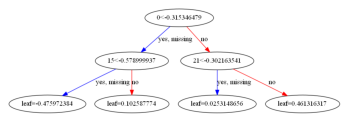

12.97387476685731
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

optimalparalist = []
rmselist = []
# Grid Search
space = dict()
space['n_estimators'] = [100,300]
space['max_depth'] = [2,3,4]
#space['eta'] =[0.01,0.1,0.3]
space['eta'] =[0.1,0.3,0.6]
space['subsample'] =[1]
space['min_child_weight'] =[1,3,5,8]
space['gamma'] = [1,5,10]
#alpha
#lamda


##Same data in R
allcols = [141, 67, 166, 128, 161, 42, 13, 186, 50, 84, 20, 105, 181, 73, 6, 72, 78, 36, 104, 109, 164, 33, 188, 125, 88, 171, 32, 83, 162, 69, 192, 41, 165, 110, 147, 155, 19, 43, 120, 86, 170, 195, 39, 24, 118, 121, 38, 168, 133, 23, 193, 129, 44, 145, 21, 114, 103, 159, 142, 143, 102, 74, 12, 157, 175, 22, 180, 172, 139, 28, 107, 47, 173, 167, 189, 30, 101, 16, 184, 131, 160, 82, 117, 113, 89, 196, 106, 63, 93, 177, 95, 158, 59, 191, 92, 178, 9, 0, 194, 58, 25, 14, 57, 130, 150, 152, 144, 75, 153, 151, 52, 85, 136, 179, 34, 123, 108, 96, 77, 146, 199, 27, 182, 60, 45, 66, 70, 116, 174, 48, 148, 55, 169, 49, 185, 163, 56, 90, 154, 115, 15, 18, 35, 1, 111, 132, 71, 91, 40, 137, 99, 187, 112, 100, 122, 198, 10, 124, 135, 94, 46, 53, 79, 8, 183, 62, 140, 98, 2, 4, 156, 190, 65, 119, 11, 149, 5, 64, 37, 127, 68, 54, 31, 81, 51, 87, 3, 26, 197, 76, 61, 7, 29, 176, 97, 126, 80, 138, 17, 134]

len(allcols)

# Split data
for i in range(1,6):
    testcol = allcols[(i-1)*40: i*40]
    #print(type(allcols));print(type(allcols[(i-1)*40: i*40]));print(type(testcol))
    traincol = allcols[0:(i-1)*40] +allcols[i*40: len(allcols)]  
    #print(testcol)
    #print(traincol)
    
    X_train = x.loc[traincol,]
    X_test = x.loc[testcol,]
    y_train = y.loc[traincol,]
    y_test = y.loc[testcol,]
    
    print(type(X_train))#;print(X_train)
    
    # transform data
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train))
    X_test = scaler.fit_transform(X_test)
    #print(X_train[0:1]);print(X_test[0:1]);print(y_train[0:1])
    print(type(X_train))


    
    
    ## XGBoost model and Hyperparameter Selection via Grid Search
    model = XGBRegressor()
    cv_inner = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    search = GridSearchCV(model, space, scoring='neg_root_mean_squared_error', n_jobs=4, cv=cv_inner)
    result = search.fit(X_train, y_train)
    # summarize result
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)
    optimalparalist.append(result.best_params_)
    
    xgbbest = XGBRegressor(gamma= result.best_params_['gamma'], min_child_weight = result.best_params_['min_child_weight'],\
                           eta = result.best_params_['eta'], max_depth = result.best_params_['max_depth'], \
                           n_estimators= result.best_params_['n_estimators'], subsample= result.best_params_['subsample'])
    
    xgbbest.fit(X_train, y_train)
    
    # plot
    # Use data frame #######################
    plot_tree(xgbbest, num_trees=50,feature_names=list(X_train.columns))
    plt.show()
    #xgbbest.get_booster().dump_model("out[i].txt")
    
    #tree_rules = export_text(xgbbest, feature_names=list(X_train.columns))
    #tree_rules = export_text(xgbbest, feature_names=list(x.columns))
    #print(tree_rules)



    y_pred = xgbbest.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    print(rmse)
    rmselist.append(rmse)

## Final results ####    
print(rmselist)
mean_rmse = sum(rmselist)/len(rmselist)
print("Mean RMSE:", mean_rmse)
#import statistics
#res = statistics.pstdev(rmselist)
#print("sd of RMSE:",res)

variance_rmse = sum([((j - mean_rmse)**2) for j in rmselist])/len(rmselist)

#variance = sum([((x - mean) ** 2) for x in test_list]) / len(test_list)

sd_rmse = variance_rmse**0.5

print("sd2 of RMSE:",sd_rmse)
print("optimal hyperparameter", optimalparalist)


####################### My code stops here. The next code is my learning process which means I use other one's code.##########

In [66]:
print(xgbbest)
#tree_rules = export_text(xgbbest, feature_names=list(X_train))
#tree_rules = export_text(xgbbest)

X_train = x.loc[traincol,]
type(X_train)
X_train.shape
list(X_train.columns)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.3, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=72,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


['                   E',
 '                   v',
 '                   A',
 '                   B',
 '                 Aln',
 '               E1200',
 '               X1200',
 '               v1200',
 '               G1200',
 '               E1800',
 '               X1800',
 '               v1800',
 '               G1800',
 '               E7500',
 '               X7500',
 '               v7500',
 '               G7500',
 '               E7781',
 '               X7781',
 '               v7781',
 '               G7781',
 '                  GS',
 '                  SS',
 '             alpha12',
 '                 d12',
 '             epsilon',
 '              sigmaY',
 '                   C',
 '                   P',
 '                  EC',
 '                  XT',
 '                  XS',
 '                  GI',
 '                 GII',
 '                  BK',
 '                  Ei',
 '                 XiT',
 '                 XiS',
 '                 GiI',
 '                GiII',


In [33]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

xgbbesttree = xgbbest.fit(X_train, y_train)
treestructure = tree.export_text(xgbbesttree)
print(treestructure)

NotFittedError: This XGBRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

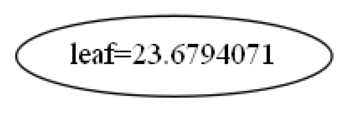

In [34]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

plot_tree(xgbbest)
plt.show()

C:\Users\dbo\anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:11:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


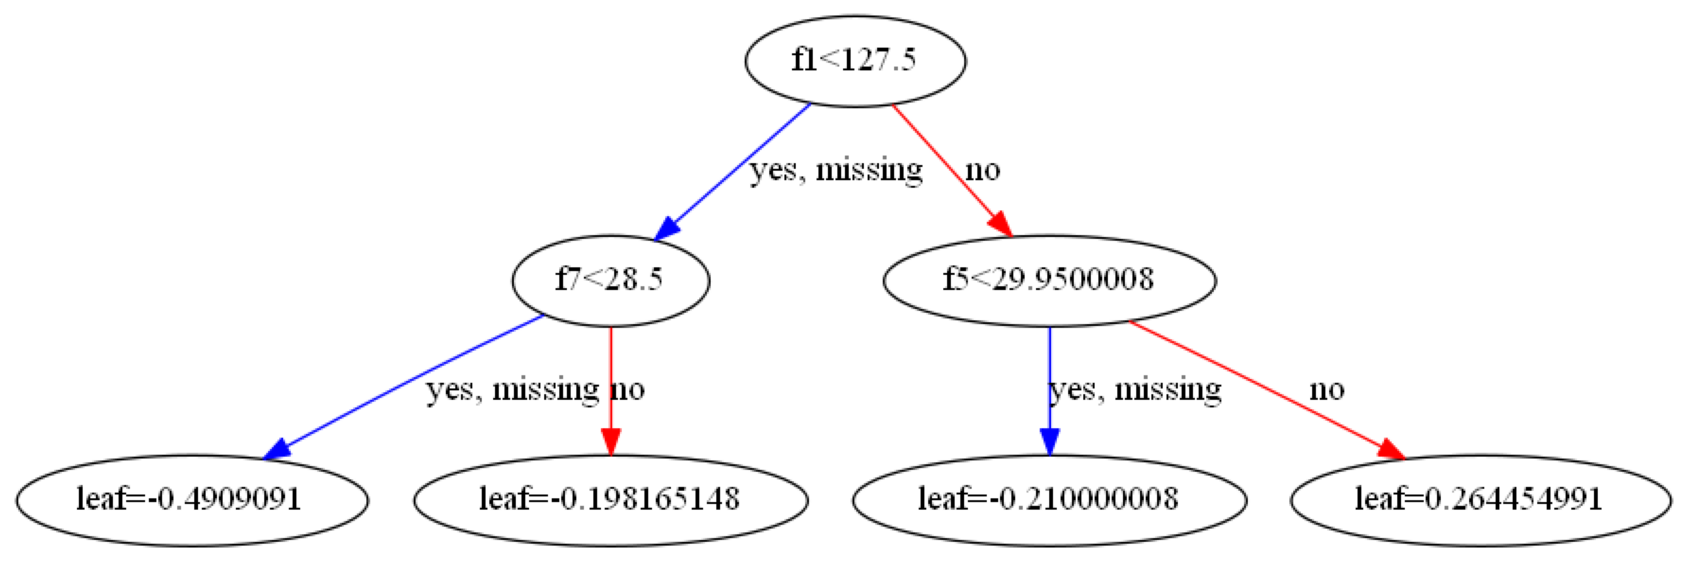

In [39]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
# load data
dataset = loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
y = dataset[:,8]
# fit model no training data
model = XGBClassifier(max_depth =2)
model.fit(X, y)
# plot single tree
plot_tree(model)
fig = plt.gcf()
fig.set_size_inches(30, 15)
#plt.show()

In [59]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

NotFittedError: need to call fit or load_model beforehand

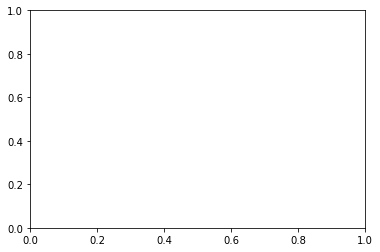

In [38]:
plot_tree(model, num_trees=99)
#plot_tree(model, num_trees=100)

[13:43:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


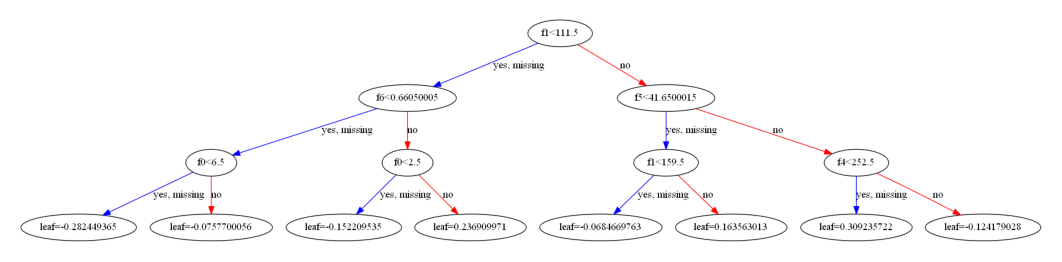

In [41]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
# load data
dataset = loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
y = dataset[:,8]
# fit model no training data
model = XGBClassifier(max_depth=3)
model.fit(X, y)
# plot single tree
fig = plt.figure(dpi=180)
ax = plt.subplot(1,1,1)
plot_tree(model, num_trees=4, ax = ax)

plt.tight_layout()
plt.savefig("tree_structure.pdf")
plt.show()

In [7]:
import pandas as pd
 
# dictionary with list object in values
details = {
    'Name' : ['Ankit', 'Aishwarya', 'Shaurya', 'Shivangi'],
    'Age' : [23, 21, 22, 21],
    'University' : ['BHU', 'JNU', 'DU', 'BHU'],
}
 
# creating a Dataframe object
df = pd.DataFrame(details, columns = ['Name', 'Age', 'University'],
                  index = ['a', 'b', 'c', 'd'])
 
# return a new dataframe by dropping a row
# 'b' & 'c' from dataframe using their
# respective index position
update_df = df.drop([df.index[1], df.index[2]])
 
print(update_df)
print(df)

data = data.drop(data.index[[1, 9, 29]])
data = data.drop(data.index[range(5)])

df.drop(df.index[2:4])

       Name  Age University
a     Ankit   23        BHU
d  Shivangi   21        BHU
        Name  Age University
a      Ankit   23        BHU
b  Aishwarya   21        JNU
c    Shaurya   22         DU
d   Shivangi   21        BHU


In [14]:
#model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)


Best Score: -10.263044720134683
Best Hyperparameters: {'eta': 0.1, 'max_depth': 1, 'n_estimators': 100, 'subsample': 1}


In [30]:
#xgbbest = XGBRegressor(colsample_bytree= 0.1, eta= 0.1, max_depth=2, n_estimators= 100, subsample= 0.8)


13.207176232845873


In [20]:
sklearn.metrics.SCORERS.keys()

NameError: name 'sklearn' is not defined

In [20]:
# initializing dictionary
test_dict = {'Gfg' : 1, 'is' : 2, 'best' : 3}
  
# printing original dictionary
print("The original dictionary is : " + str(test_dict))
  
# Using keys() + list()
# Getting first key in dictionary
res = list(test_dict.keys())[0]
firstkey = list(test_dict.keys())
firstitem = list(test_dict.items())
print(firstvalue)
print(firstitem)
# printing initial key
print("The first key of dictionary is : " + str(res))

The original dictionary is : {'Gfg': 1, 'is': 2, 'best': 3}
['Gfg', 'is', 'best']
[('Gfg', 1), ('is', 2), ('best', 3)]
The first key of dictionary is : Gfg


In [27]:
  # Dictionary of string and int
word_freq = {
    'Hello' : 56,
    "at"    : 23,
    'test'  : 43,
    'This'  : 78,
    'Why'   : 11
}
# Get first value of dictionary
first_value = list(word_freq.items())[0][1]
print('First Value: ', first_value)
list(word_freq.items())

First Value:  56


[('Hello', 56), ('at', 23), ('test', 43), ('This', 78), ('Why', 11)]

In [28]:
word_freq["at"]

23